#### Loan data

#### file reading /data ingetion

In [1]:
import pandas as  pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as  plt

In [2]:
path  =  r"C:\Users\admin\Downloads\train_loan.xlsx"

In [3]:
df  =  pd.read_excel(path)

#### basic  data quality checks

In [4]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [8]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

##### seperation of X and  Y

In [10]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [12]:
x  =  df.drop(['id' , 'loan_status'] ,  axis  =  1)
y  =  df['loan_status']

In [13]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [16]:
a  =  y.value_counts()
a

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [17]:
y.shape

(58645,)

##### seperation of cat and  num data

In [19]:
cat  =  x.columns[x.dtypes  == 'object']
num  =  x.columns[x.dtypes  != 'object']

In [20]:
print(cat)
print()
print(num)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


### create pipeline

In [23]:
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing  import StandardScaler , OrdinalEncoder
from sklearn.compose  import ColumnTransformer
from sklearn.impute  import SimpleImputer

In [24]:
num_pipeline =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean' ) ) , 
 ('scaler' , StandardScaler())])
cat_pipeline  =  Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  =  'most_frequent')) ,  
                        ('encoder' , OrdinalEncoder())]) 


In [26]:
## compose  both  pipelines
pre  =  ColumnTransformer([('num' ,  num_pipeline  ,  num) ,  
                         ('cat' ,  cat_pipeline  ,  cat)])

In [27]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [28]:
## aply  pre  to data
x_scaled  =  pre.fit_transform(x)

In [29]:
x_scaled

array([[ 1.56620019, -0.7657678 , -1.18719967, ...,  1.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.21212778,  0.32804728, ...,  3.        ,
         2.        ,  0.        ],
       [ 0.2401962 , -0.92922343,  0.8331296 , ...,  4.        ,
         0.        ,  0.        ],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ...,  1.        ,
         3.        ,  0.        ],
       [-0.92005729, -0.89758686, -0.68211735, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5716972 ,  0.28878463, -0.68211735, ...,  5.        ,
         1.        ,  0.        ]], shape=(58645, 11))

In [30]:
## convert  in dataframe
x_scaled  =  pd.DataFrame(x_scaled  ,  
            columns  =  pre.get_feature_names_out())

In [31]:
x_scaled.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership,cat__loan_intent,cat__loan_grade,cat__cb_person_default_on_file
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,3.0,1.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,2.0,3.0,2.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,2.0,4.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,3.0,5.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,3.0,3.0,0.0,0.0


#### train test  split

In [32]:
from  sklearn.model_selection  import train_test_split

In [33]:
x_train  , x_test ,  y_train  , y_test =  train_test_split(x_scaled ,  y  ,
                                            random_state  =  3  , 
                                            test_size  =  0.2)

In [34]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(46916, 11) (46916,)
(11729, 11) (11729,)


In [35]:
x_train.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership,cat__loan_intent,cat__loan_grade,cat__cb_person_default_on_file
49099,-0.754307,0.552423,-1.187200,-0.578306,-1.215247,-0.973242,-0.946489,0.0,5.0,0.0,0.0
22709,0.074446,0.921516,0.075506,0.545035,-0.262920,-0.427932,0.046274,0.0,2.0,1.0,0.0
41522,0.240196,-0.238492,-0.429576,-0.982709,-1.291038,-0.973242,0.046274,0.0,0.0,0.0,0.0
44649,-0.920057,-0.370311,0.075506,0.140632,-0.915379,0.444564,-0.450108,0.0,1.0,0.0,0.0
34453,-0.920057,-0.443918,-0.682117,0.140632,0.784970,0.553626,-0.698298,3.0,1.0,2.0,1.0


In [36]:
y_train.head()

49099    0
22709    0
41522    0
44649    0
34453    0
Name: loan_status, dtype: int64

In [37]:
x_test.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership,cat__loan_intent,cat__loan_grade,cat__cb_person_default_on_file
43800,-0.588556,-0.502130,0.83313,-1.117510,-0.882427,-0.973242,-0.450108,3.0,2.0,0.0,0.0
44991,-0.091305,0.684242,-1.18720,0.500101,-0.572673,-0.318870,0.542655,3.0,2.0,0.0,0.0
28892,0.240196,1.211518,-1.18720,2.836651,-0.585854,0.771749,0.294464,2.0,1.0,0.0,0.0
17086,0.240196,2.266070,-1.18720,2.656916,1.776840,0.008316,0.790845,0.0,5.0,3.0,0.0
38699,-0.588556,-0.739404,-1.18720,-0.758041,0.840989,-0.209808,-0.450108,3.0,1.0,2.0,0.0


In [38]:
y_test.head()

43800    0
44991    0
28892    0
17086    0
38699    0
Name: loan_status, dtype: int64

##### model fitting  on  train  data

In [42]:
from  sklearn.svm  import SVC
svc  = SVC( )

In [40]:
x.shape

(58645, 11)

In [ ]:
svc.fit(x_train  ,  y_train )

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
svc.score(x_train ,  y_train)

0.9313880126182965

In [45]:
svc.score(x_test  ,  y_test)

0.9270185011509933

In [ ]:
from  sklearn.metrics  import classification_report ,  
                               confusion_matrix

#### evaluation

In [50]:
train_pred  =  svc.predict(x_train)
test_pred  = svc.predict(x_test)

In [51]:
print(classification_report(y_train  ,  train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     40224
           1       0.87      0.61      0.72      6692

    accuracy                           0.93     46916
   macro avg       0.90      0.80      0.84     46916
weighted avg       0.93      0.93      0.93     46916



In [52]:
cfm = confusion_matrix(y_train  ,  train_pred)

<Axes: >

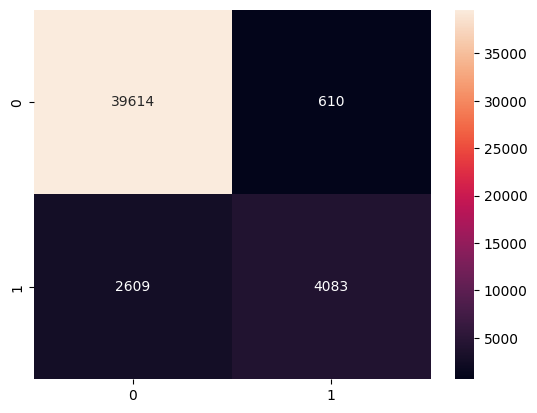

In [ ]:
sns.heatmap(cfm  , annot  =  True  , 
fmt  =  'd' ,  
xticklabels  =  True  , 
yticklabels  = True )

#### test evaluation

In [54]:
print(classification_report(y_test ,  test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10071
           1       0.86      0.58      0.69      1658

    accuracy                           0.93     11729
   macro avg       0.90      0.78      0.82     11729
weighted avg       0.92      0.93      0.92     11729



In [56]:
cfm_test =  confusion_matrix(y_test  ,  test_pred)

<Axes: >

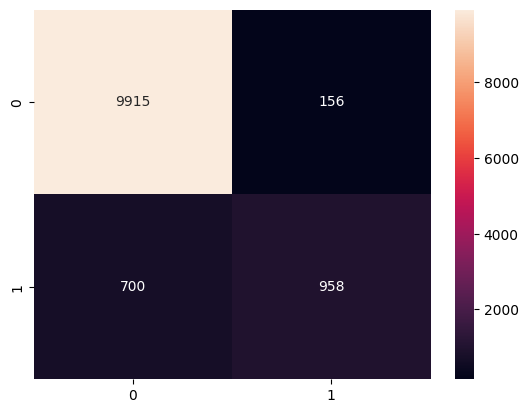

In [57]:
sns.heatmap(cfm_test , annot  =  True  , 
fmt  =  'd' ,  
xticklabels  =  True  , 
yticklabels  = True )

###  oversampling method  by  smote
- synthetic  monitoring  oversampling technique

In [58]:
%pip  install  imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)

   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from imblearn.over_sampling  import SMOTE

In [60]:
smote = SMOTE(random_state  = 3)

In [64]:
x.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [66]:
x_res  ,  y_res  =  smote.fit_resample(x_train , y_train)

In [67]:
y_train.value_counts()

loan_status
0    40224
1     6692
Name: count, dtype: int64

In [68]:
y_res.value_counts()

loan_status
0    40224
1    40224
Name: count, dtype: int64

In [ ]:
###  oversampling 
- adding  records /  rows /  obsn in  class  which contain less
data

###  undersampling
removing  obsns  from class  containing maximum  data
till  obsn number is  same  as  that  of another class

In [74]:
svc_res  =  SVC()


In [75]:
svc_res.fit(x_res  ,  y_res)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [76]:
svc_res.score(x_train ,  y_train)

0.9001619916446415

In [73]:
train_pred_ =  svc_res.predict(x_train )

In [ ]:
print(classification_report(y_train , train_pred_)